<h1 style="text-align: center; color: #ff69b4; font-size: 32px; font-weight: bold;">
    💡 Predicting Medical Insurance Costs Using Machine Learning
</h1>
<hr style="height: 2px; border: none; background-color: #ff69b4;">


<h1 style=" color: orange; font-size: 32px; font-weight: bold;">
    🧭 1. Business Understanding
</h1>

<p><strong>📌 Business Objectives :</strong></p>
<ul>
    <li>💰 <strong>BO1:</strong> Anticipate policyholders’ future healthcare expenses to improve cost management</li>
    <li>📊 <strong>BO2:</strong> Identify homogeneous groups of policyholders to personalize offers and better target services</li>
    <li>🛡️ <strong>BO3:</strong> Detect fraudulent or atypical behaviors to reduce financial losses.</li>
</ul>

<p><strong>📈 Data Science Objectives:</strong></p>
<ul>
    <li>📉 <strong>DSO1:</strong> Build a supervised regression model capable of predicting the variable charges based on policyholders’ characteristics (age, sex, BMI, children, smoker, region).</li>
    <li>📊 <strong>DSO2:</strong> Apply clustering methods to policyholder data to segment the population and analyze each group’s profile.</li>
    <li>🛡️ <strong>DSO3:</strong> Implement an unsupervised anomaly detection model (Isolation Forest) capable of identifying policyholders with atypical or suspicious behaviors compared to the overall population.</li>
</ul>




<h1 style="color: orange ; font-size: 32px; font-weight: bold;">
    📊 2. Data Understanding
</h1>

<p>In this section, we load the <code>dataassurance.csv</code> dataset and perform an initial exploration 
to understand its structure, detect missing values, and analyze the main statistical characteristics 
of the features (age, sex, bmi, children, smoker, region, charges).</p>

<h2 style="color: #2E86C1;">🔍 Key Objectives:</h2>
<ul>
    <li>📥 <strong>Load the dataset</strong> into the environment.</li>
    <li>🗂️ <strong>Examine its structure</strong>, including rows, columns, and data types.</li>
    <li>🔎 <strong>Detect missing values</strong> and assess their impact on analysis.</li>
    <li>📊 <strong>Summarize key statistics</strong> (mean, median, variance, distributions).</li>
</ul>

<h2 style="color: #2E86C1;">⚙️ Steps:</h2>
<ul>
    <li>✔️ Load the data using pandas and inspect the first few rows for an overview.</li>
    <li>📊 Generate descriptive statistics to understand central tendencies and variability.</li>
    <li>🧹 Handle missing values through imputation .</li>
    <li>📈 Visualize feature distributions .</li>
</ul>

<h2 style="color: #2E86C1;">🧾 Expected Outputs:</h2>
<ul>
    <li>📝 Summary of dataset dimensions (rows × columns).</li>
    <li>🔢 Description of features, their types (categorical vs numerical), and unique values.</li>
    <li>⚠️ Missing value counts and chosen handling strategies.</li>
    <li>📉 Statistical insights: mean, median, mode, variance, and standard deviation of features.</li>
    <li>📊 Visual plots showing data distribution (histograms, boxplots, etc.).</li>
</ul>


In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [94]:
data=pd.read_csv('dataAssuranceU.csv')

In [96]:
from IPython.display import display, HTML

# Display a styled message
display(HTML("<h2 style='color: #D35400;text-decoration: underline;'>🔍 First 5 Rows of the Data:</h2>"))
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


<h5>➡️ We display the first five rows of the <code>dataassurance.csv</code> dataset to get an initial overview of its structure and contents.</h5>


In [99]:
data.shape

(2781, 7)

In [101]:
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [103]:
from IPython.display import display, HTML

# Display styled header messages
display(HTML("<h2 style='color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;'>🧾 Data Information:</h2>"))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2744 non-null   float64
 1   sex       2743 non-null   object 
 2   bmi       2748 non-null   float64
 3   children  2752 non-null   float64
 4   smoker    2755 non-null   object 
 5   region    2748 non-null   object 
 6   charges   2752 non-null   float64
dtypes: float64(4), object(3)
memory usage: 152.2+ KB


In [105]:
display(HTML("<h2 style='color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;'>📊 Summary Statistics:</h2>"))
data.describe()

,age,bmi,children,charges
count,2744.000000,2748.000000,2752.000000,2752.000000
mean,39.192784,30.651212,1.090480,13223.606662
std,14.056200,6.104509,1.200459,12045.048983
min,18.000000,15.960000,0.000000,1121.870000
25%,26.000000,26.220000,0.000000,4746.343000
50%,39.000000,30.332500,1.000000,9377.902350
75%,51.000000,34.700000,2.000000,16579.959427
max,64.000000,53.130000,5.000000,63770.430000


MISSING VALUES ANALYSIS
          Missing Values  Percentage (%)
age                   37        1.330457
sex                   38        1.366415
bmi                   33        1.186624
children              29        1.042790
smoker                26        0.934915
region                33        1.186624
charges               29        1.042790


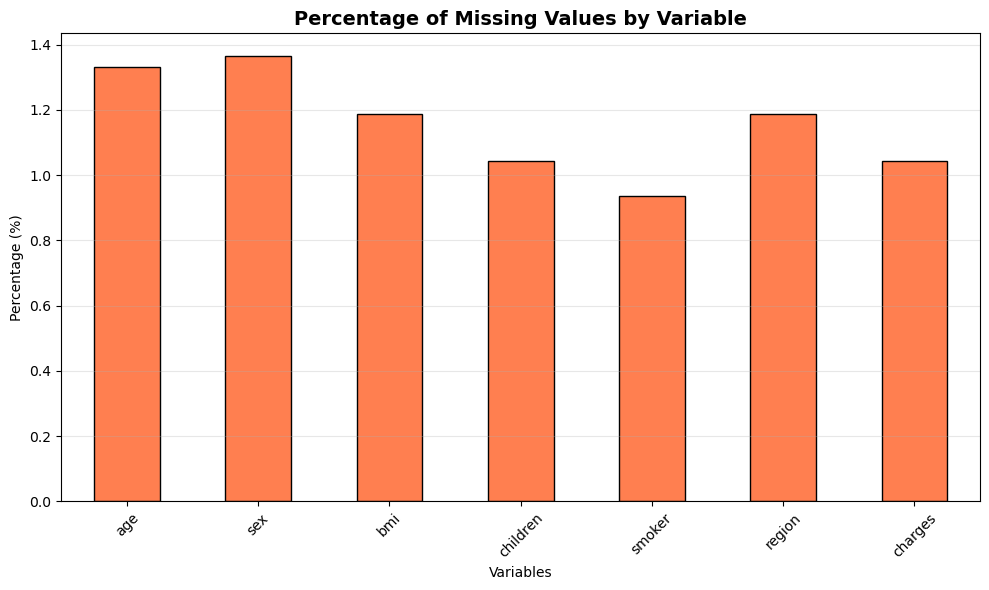

In [107]:
# Check for missing values
print("="*70)
print("MISSING VALUES ANALYSIS")
print("="*70)

missing_counts = data.isnull().sum()
missing_percentages = (data.isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentages
})

print(missing_df)

# Visualization
if missing_counts.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df['Percentage (%)'].plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Percentage of Missing Values by Variable', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Variables')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values detected in the dataset!")



<p>Based on the analysis of the <code>dataassurance.csv</code> dataset, we observe the following key points:</p>
<ul>
    <li>🧑‍💼 The dataset contains <strong>2,781 entries</strong> and 7 columns, including both numerical and categorical features.</li>
    <li>📊 Numerical features include <code>age</code>, <code>bmi</code>, <code>children</code>, and <code>charges</code>, while categorical features are <code>sex</code>, <code>smoker</code>, and <code>region</code>.</li>
</ul>



<h2 style="color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;">
    📊 Plotting
</h2>

<p>In this section, we visualize key features of the <code>dataassurance.csv</code> dataset to uncover patterns, relationships, and potential insights. Visualizations help understand distributions, detect anomalies, and guide feature engineering and model selection for regression, clustering, and fraud detection tasks.</p>

<h3 style="color: #2E86C1;">🔍 Key Objectives:</h3>
<ul>
    <li>📈 <strong>Examine numerical feature distributions</strong> (<code>age</code>, <code>bmi</code>, <code>children</code>, <code>charges</code>) to understand shapes and detect outliers.</li>
    <li>📊 <strong>Explore relationships</strong> between numerical and categorical variables (<code>sex</code>, <code>smoker</code>, <code>region</code>).</li>
    <li>📉 <strong>Identify correlations</strong> and interactions among features that could impact model performance.</li>
</ul>




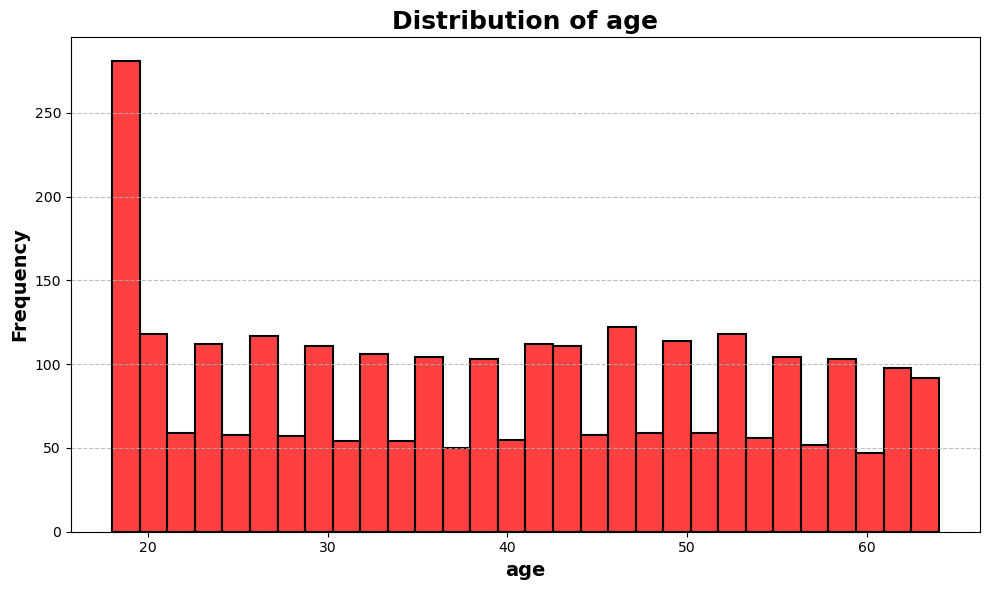

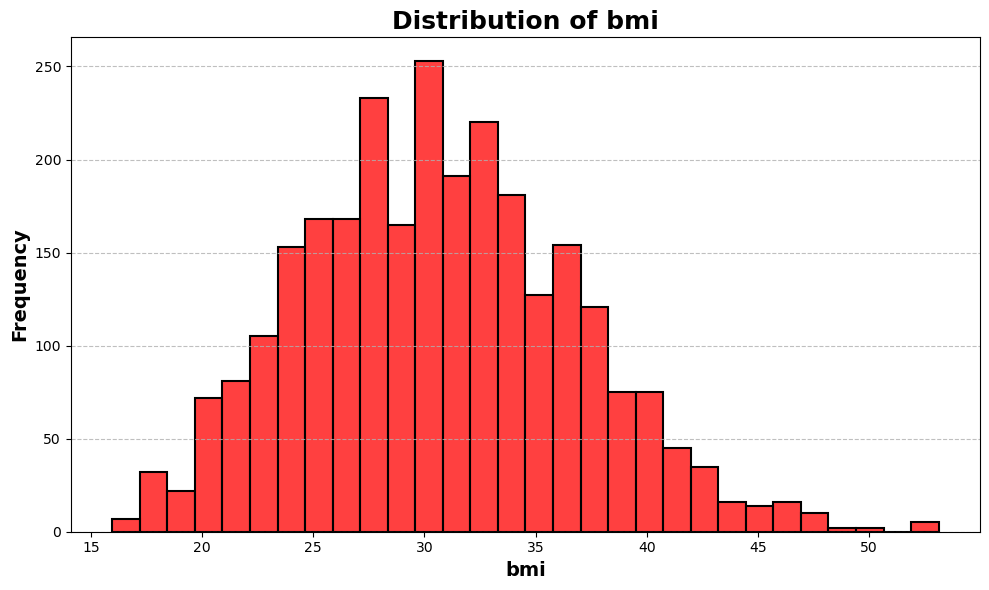

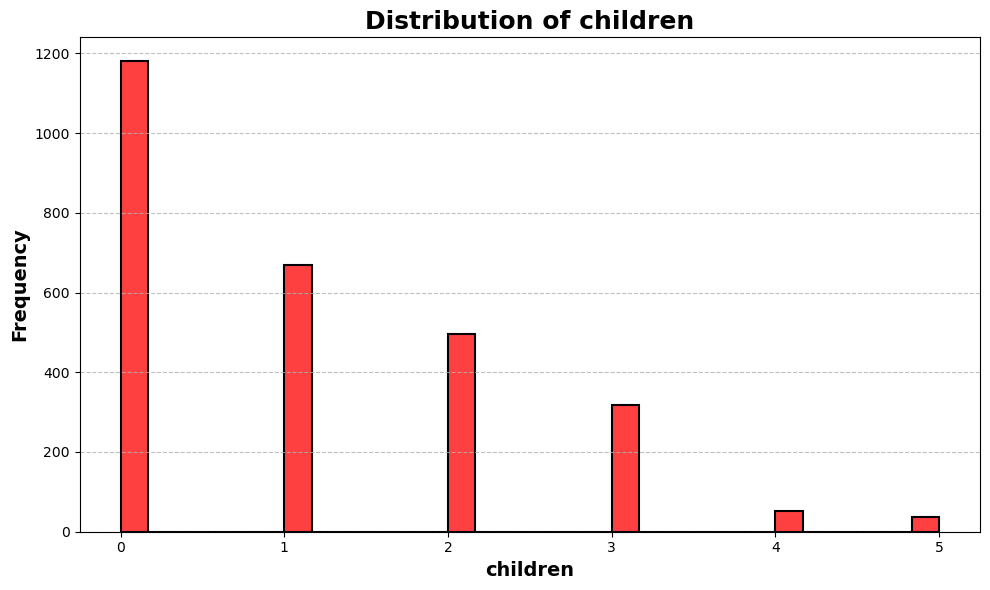

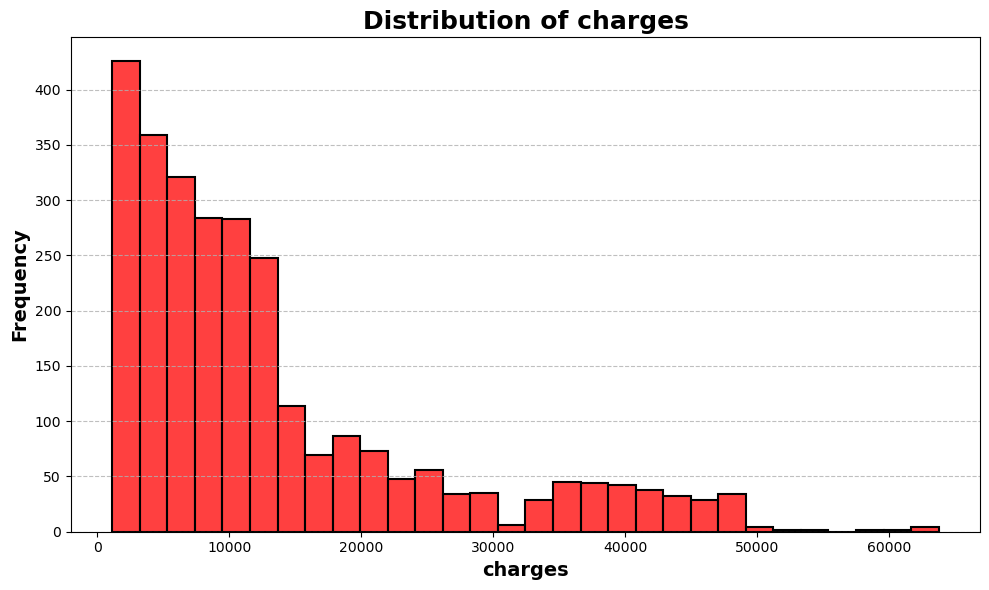

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Loop over each numerical column and plot separately
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create histogram with KDE and pastel pink and green color theme
    sns.histplot(data[col], kde=False, color="red", edgecolor="black", linewidth=1.5, bins=30)
    
    # Add title and axis labels with improved formatting
    plt.title(f'Distribution of {col}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel(col, fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')
    
    # Customize grid and background
    plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)
    

    
    # Adjust layout to avoid clipping
    plt.tight_layout()
    plt.show()

<h3 style="color: #D35400;">Observations</h3>

<h2 style="color: #2E86C1;">1. Age Distribution (age)</h2>
<ul>
    <li><strong>Nearly uniform distribution:</strong> The age distribution is relatively even across the range, with the number of policyholders per age group varying between 100 and 120.</li>
    <li><strong>Notable peak among young adults:</strong> A strong concentration of policyholders around ages 18–19 (approximately 280 people), possibly indicating a targeted campaign toward young adults or the minimum subscription age.</li>
    <li><strong>Full coverage:</strong> The portfolio spans a wide age range (~18 to ~64 years), reflecting a diverse clientele.</li>
    <li><strong>No significant under-representation:</strong> No age group is neglected, which is positive for risk pooling.</li>
</ul>

<h2 style="color: #2E86C1;">2. BMI Distribution (Body Mass Index)</h2>
<ul>
    <li><strong>Nearly normal distribution:</strong> BMI approximately follows a Gaussian distribution centered around 30–32.</li>
    <li><strong>High average:</strong> The peak is around 30, corresponding to the overweight/obesity threshold according to medical standards (BMI ≥ 30 = obesity).</li>
    <li><strong>Significant spread:</strong> Values range from about 15 (underweight) to 53 (morbid obesity).</li>
    <li><strong>Right-skewed tail:</strong> Presence of individuals with very high BMI (>45), representing profiles with increased health risk.</li>
</ul>

<h2 style="color: #2E86C1;">3. Children Distribution (children)</h2>
<ul>
    <li><strong>Discrete distribution:</strong> Categorical variable taking integer values from 0 to 5.</li>
    <li><strong>Majority without children:</strong> About 1,180 policyholders (≈88%) have no dependent children, making this the dominant category.</li>
    <li><strong>Gradual decrease:</strong> The number of policyholders decreases progressively as the number of children increases:
        <ul>
            <li>1 child: ~670 policyholders</li>
            <li>2 children: ~500 policyholders</li>
            <li>3 children: ~320 policyholders</li>
            <li>4 children: ~60 policyholders</li>
            <li>5 children: ~40 policyholders</li>
        </ul>
    </li>
    <li><strong>Rarity of large families:</strong> Very few policyholders hav<h2 style="color: #2E86C1;">4. Charges Distribution (charges)</h2>
<ul>
    <li><strong>Strong right-skewed distribution:</strong> Most policyholders generate relatively low costs, with a long tail extending towards higher values.</li>
    <li><strong>Peak around $5,214:</strong> The highest concentration of policyholders is in the lower range (0–10,000 USD), representing about 1,600 policyholders.</li>
    <li><strong>Rapid decrease:</strong> Frequency declines quickly after 10,000 USD, following a typical exponential decay pattern for insurance claims.</li>
    <li><strong>Extreme cases:</strong> Some policyholders incur charges up to 60,000–70,000 USD, likely due to severe or chronic medical conditions.</li>
</ul>


<h3 style="color: #D35400;">Business Implications</h3>


<h3 style="color: #D35400;">1. Age</h3>
<ul>
    <li><strong>Good diversification of actuarial risk</strong></li>
    <li><strong>Potential for targeted offerings by age group</strong> (young adults, seniors, etc.)</li>
</ul>


<h3 style="color: #D35400;">2. BMI</h3>
<ul>
    <li><strong>High health risk:</strong> A large proportion of the insured population is overweight or obese, which may lead to higher healthcare costs (diabetes, cardiovascular diseases, etc.).</li>
    <li><strong>Prevention opportunities:</strong> Potential for wellness and health prevention programs (nutritional coaching, gym reimbursement).</li>
    <li><strong>Pricing:</strong> Need to integrate BMI into pricing models to reflect actual risk.</li>
    <li><strong>Segmentation:</strong> BMI will likely be an important discriminating factor in clustering analyses.</li>
</ul>


<h3 style="color: #D35400;">3. Children</h3>
<ul>
    <li><strong>Demographic profile:</strong> The portfolio is dominated by people without children (singles, couples without children, or children already grown).</li>
    <li><strong>Impact on charges:</strong>
        <ul>
            <li>Families with children may generate higher medical costs (pediatrics, vaccinations, etc.).</li>
            <li>However, children are generally less costly than adults in terms of health.</li>
        </ul>
    </li>
    <li><strong>Product segmentation:</strong> Opportunity to create specific offerings:
        <ul>
            <li>Individual for 0 children</li>
            <li>Family for 1–2 children</li>
            <li>Large family for 3+ children</li>
        </ul>
    </li>
    <li><strong>Potential correlation:</strong> To explore with age (young people tend to have 0 children, 30–45 age group more children).</li>
    <li><strong>Moderate predictive variable:</strong> Its impact on charges will likely be less significant than BMI or smoker status.</li>
</ul>


<h3 style="color: #D35400;">4. Charges</h3>
<ul>
    <li><strong>Risk pooling principle:</strong> The majority of policyholders (healthy profiles) fund the care of the minority with high costs.</li>
    <li><strong>Risk management:</strong> Extreme values (>40,000 USD) require special attention for reinsurance and solvency.</li>
    <li><strong>Pricing:</strong> Crucial to identify predictive factors for high charges to optimize pricing.</li>
    <li><strong>Provisioning:</strong> Adequate provisions are needed to manage this significant variability.</li>
    <li><strong>Modeling challenge:</strong> Non-normal distribution may require transformations (log) or models adapted to skewed data.</li>
</ul>


<h2 style="color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;">
    📦 Outlier Detection with Boxplots
</h2>

<p>This section focuses on detecting outliers using boxplots. Outliers are extreme values that deviate from most observations and can affect model performance. Boxplots offer a clear and simple way to visualize these points.</p>

<h3 style="color: #2E86C1;">🔍 Key Objectives:</h3>
<ul>
    <li>📊 <strong>Detect outliers</strong> in numerical features.</li>
    <li>📉 <strong>Assess data spread</strong> and identify anomalies.</li>
    <li>🛠️ <strong>Guide data cleaning</strong> by deciding whether to keep, remove, or transform outliers.</li>
</ul>




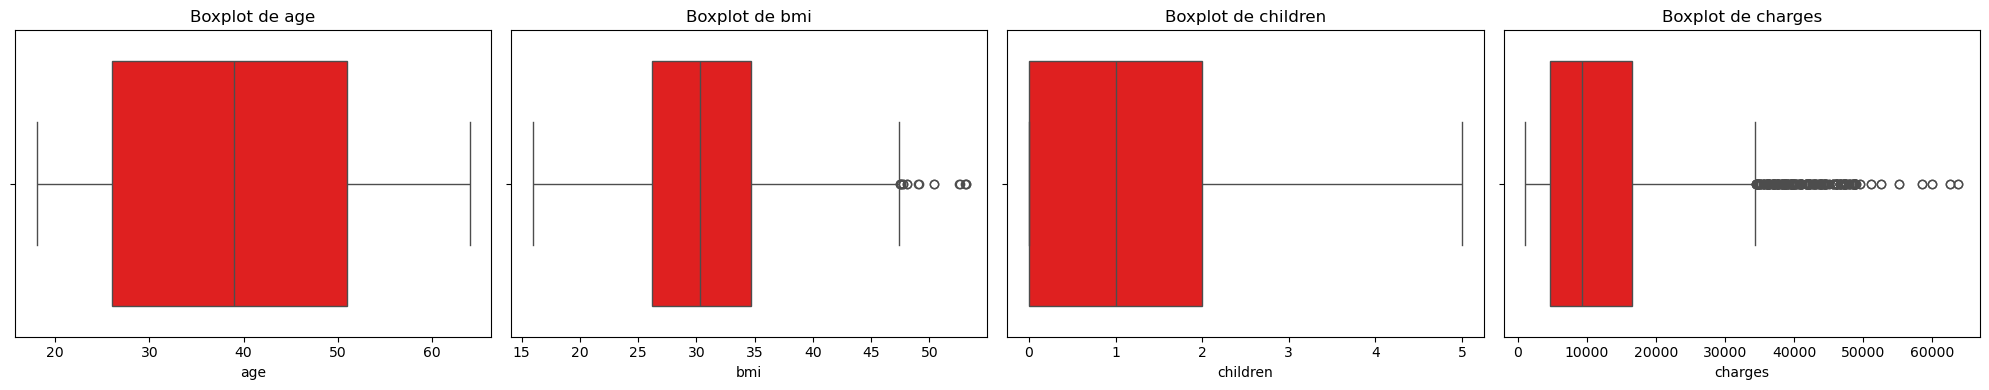

In [120]:
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(20, 4))

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=data[column], ax=axes[i], color='red')
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

<h3 style="color: #D35400;">Number of Outliers per Numerical Column (IQR Method)</h3>


In [122]:
for column in numerical_cols:
    # Calcul des quartiles et de l'IQR
    print(column)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les limites des outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détecter les positions des outliers 
    outlier_positions = ((data[column] < lower_bound) | (data[column] > upper_bound))
    print(outlier_positions.sum())

age
0
bmi
17
children
0
charges
284


<h3 style="color: #D35400;">Scatter Plots</h3>

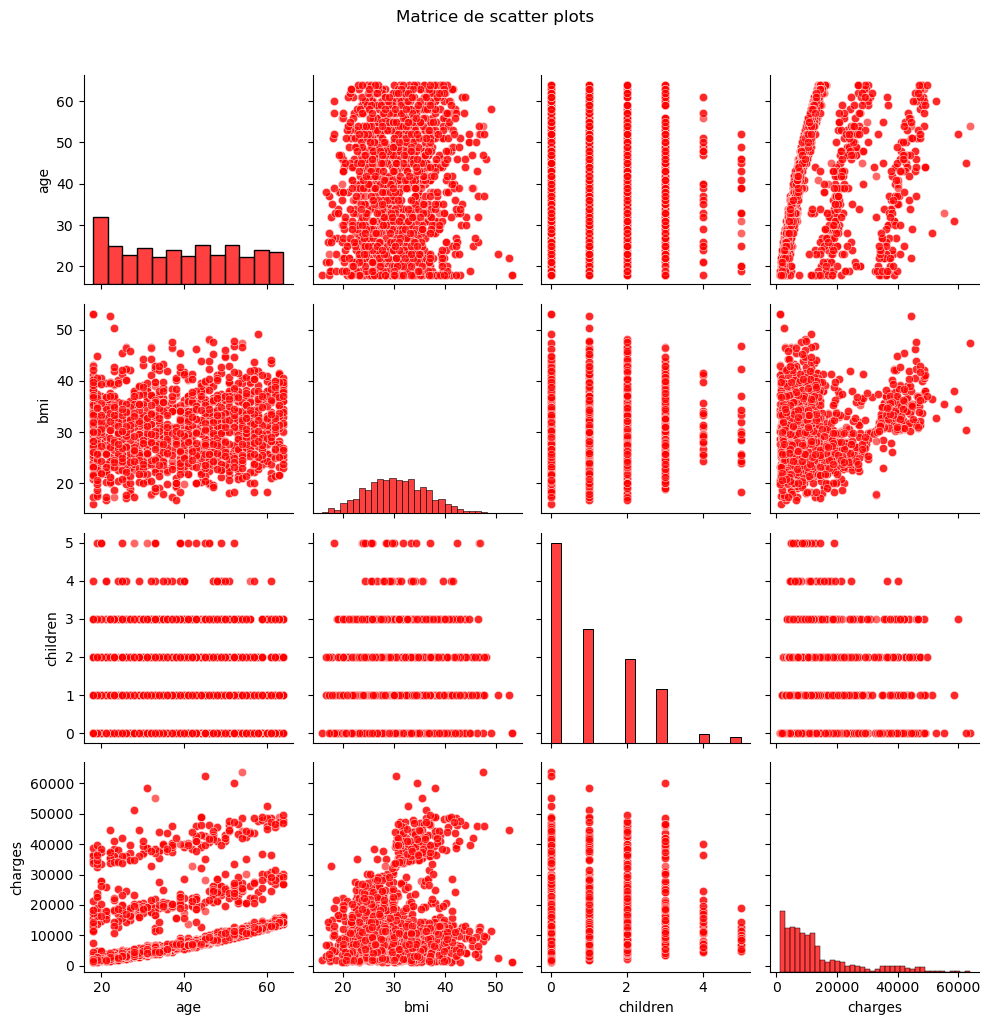

In [126]:
import seaborn as sns

# Pairplot avec seaborn
sns.pairplot(data[numerical_cols], 
             diag_kind='hist', 
             plot_kws={'alpha': 0.6, 'color': 'red'},
             diag_kws={'color': 'red'})
plt.suptitle('Matrice de scatter plots', y=1.02)
plt.tight_layout()
plt.show()

<h2 style="color: #2C3E50; font-size: 22px; font-weight: bold; text-decoration: underline;">
📊 Relationships with Charges (Bottom Row)
</h2>

<h3 style="color: #D35400;">1. Age vs Charges (Bottom-Left)</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>Moderate positive relationship: charges generally increase with age.</li>
  <li>Three distinct groups are visible, suggesting the existence of different sub-populations (likely smokers vs non-smokers).</li>
  
</ul>

<h3 style="color: #D35400;">2. BMI vs Charges (Middle, Bottom Row)</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>Scattered cloud of points with two main clusters.</li>
  <li>Weaker relationship compared to age, but distinct groups are still observable.</li>
  <li>Some individuals with very high BMI are associated with extremely high charges.</li>
</ul>

<h3 style="color: #D35400;">3. Children vs Charges (Bottom-Right)</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>Vertical bands correspond to discrete values of the number of children (0, 1, 2, 3, 4, 5).</li>
  <li>Minimal apparent impact of the number of children on charges.</li>
  <li>Charges distribution looks similar across all categories.</li>
</ul>


<h2 style="color: #2C3E50; font-size: 22px; font-weight: bold; text-decoration: underline;">
📊 Relationships Between Explanatory Variables
</h2>

<h3 style="color: #D35400;">1. Age vs BMI</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>No strong correlation: BMI does not appear to vary significantly with age.</li>
  <li>Points are scattered fairly uniformly, indicating no clear trend.</li>
</ul>

<h3 style="color: #D35400;">2. Age vs Children</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>Horizontal bands correspond to the discrete number of children.</li>
  <li>Slight upward trend: older individuals tend to have more children (logical).</li>
</ul>

<h3 style="color: #D35400;">3. BMI vs Children</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>No apparent relationship: BMI seems independent of the number of children.</li>
</ul>


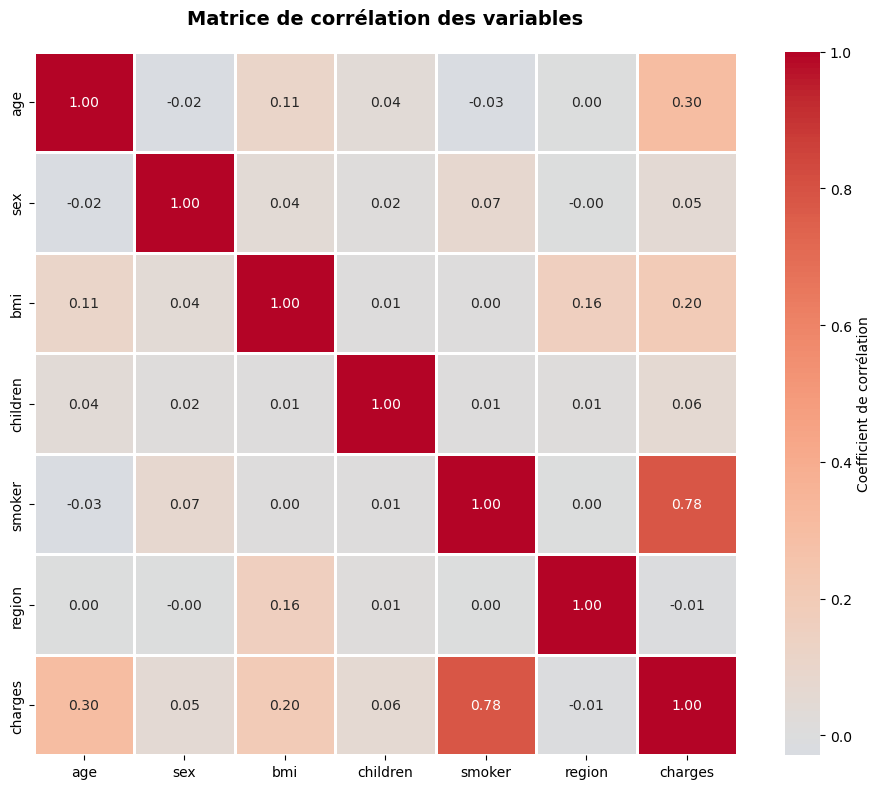


=== Corrélations avec les charges (triées) ===
charges     1.000000
smoker      0.782069
age         0.300528
bmi         0.199456
children    0.059249
sex         0.050162
region     -0.006673
Name: charges, dtype: float64


In [129]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))

# Encoder les variables catégorielles pour la corrélation
data_encoded = data.copy()
data_encoded['sex'] = data_encoded['sex'].map({'male': 1, 'female': 0})
data_encoded['smoker'] = data_encoded['smoker'].map({'yes': 1, 'no': 0})
data_encoded['region'] = data_encoded['region'].astype('category').cat.codes

# Calculer la matrice de corrélation
correlation_matrix = data_encoded.corr()

# Créer la heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Coefficient de corrélation'})

plt.title('Matrice de corrélation des variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Afficher les corrélations avec charges triées
print("\n=== Corrélations avec les charges (triées) ===")
print(correlation_matrix['charges'].sort_values(ascending=False))

<h2 style="color: #2C3E50; font-size: 22px; font-weight: bold; text-decoration: underline;">
 Correlation Matrix 
</h2>

<h3 style="color: #D35400;">Correlations with Charges (Right Column)</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li><strong>Smoker:</strong> 0.78 🥇 - DOMINANT FACTOR (very strong correlation)</li>
  <li><strong>Age:</strong> 0.30 🥈 - Moderate but significant impact</li>
  <li><strong>BMI:</strong> 0.20 🥉 - Low to moderate impact</li>
  <li><strong>Children:</strong> 0.06 - Negligible impact</li>
  <li><strong>Sex:</strong> 0.05 - Almost no impact</li>
  <li><strong>Region:</strong> -0.01 - No impact</li>
</ul>

<h3 style="color: #D35400;">Other Important Observations</h3>
<ul style="font-size: 15px; line-height: 1.6;">
  <li>Age - Sex: -0.02 → Independent</li>
  <li>Age - BMI: 0.11 → Very weak correlation</li>
  <li>Smoker - BMI: 0.00 → Totally independent (smokers do not have a different BMI)</li>
  <li>No multicollinearity between explanatory variables → Excellent for regression!</li>
</ul>




<h3 style="color: #2E86C1;">🔍 Key Observations:</h3>
<ul>
    <li>📊 <strong>Age and children:</strong> No significant outliers, distributions are fairly centered.</li>
    <li>📉 <strong>BMI and charges:</strong> Several outliers present, especially at high values, indicating some individuals with very high BMI or charges.</li>
</ul>




<h1 style="color: orange; font-size: 32px; font-weight: bold;">
    🛠️ 3. Data Preparation
</h1>

<p>In this section, we focus on preparing the insurance dataset (<code>age, sex, bmi, children, smoker, region, charges</code>) for modeling. This involves handling missing values, encoding categorical features, and scaling numerical features to ensure compatibility with machine learning algorithms.</p>

<h2 style="color: #2E86C1;">🔍 Key Objectives:</h2>
<ul>
    <li>🧹 <strong>Handle missing values</strong>  to ensure data integrity.</li>
    <li>🧑‍💻 <strong>Encode categorical variables</strong> such as <code>sex</code>, <code>smoker</code>, and <code>region</code> for modeling.</li>
</ul>

<h2 style="color: #2E86C1;">⚙️ Steps:</h2>
<ul>
    <li>✔️ Check for missing values and impute .</li>
    <li>🔠 Encode categorical features: <code>sex</code>, <code>smoker</code>, <code>region</code> .</li>
    <li>📐 Standardize or normalize numerical feature> to improve model convergence.</li>
</ul>

<h2 style="color: #2E86C1;">🧾 Expected Outputs:</h2>
<ul>
    <li>📝 Cleaned dataset withno  missing values.</li>
    <li>🔠 Encoded categorical variables).</li>
    <li>📏 Scaled numerical features).</li>
</ul>


<h2 style="color: #D35400; font-size: 22px; font-weight: bold; text-decoration: underline;">
🛠️ Handling Missing Data
</h2>

In [135]:
data.isnull().sum()

age         37
sex         38
bmi         33
children    29
smoker      26
region      33
charges     29
dtype: int64

### The analysis of missing values reveals the following insights:

- 📊 **Missing Values Detected:** Some features have missing values:  
  - `age`: 37 missing  
  - `sex`: 38 missing  
  - `bmi`: 33 missing  
  - `children`: 29 missing  
  - `smoker`: 26 missing  
  - `region`: 33 missing  
  - `charges`: 29 missing  

- 🎯 **Data Integrity Impact:** The presence of missing values in multiple features indicates that we need to handle them carefully.

- 🔍 **Preprocessing Consideration:** Handling these missing values is crucial before scaling numerical features, encoding categorical variables, or building predictive models. Proper treatment ensures the dataset remains reliable and preserves as much information as possible.




In [139]:
df=data.copy()

In [141]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Identify columns with NaN
columns_with_na = df.columns[df.isna().sum() > 0]

# Loop through each column with NaN
for col in columns_with_na:
    print(f"Processing column: {col}")
    
    # Separate known and missing data
    df_known = df[df[col].notna()]
    df_missing = df[df[col].isna()]
    
    if df_missing.empty:
        continue
    
    # X: all other columns
    X_known = df_known.drop(col, axis=1)
    y_known = df_known[col]
    X_missing = df_missing.drop(col, axis=1)
    
    # Encode categorical variables
    X_full = pd.get_dummies(pd.concat([X_known, X_missing]), drop_first=True)
    X_known_encoded = X_full.iloc[:len(X_known), :]
    X_missing_encoded = X_full.iloc[len(X_known):, :]
    
    # Choose model based on column type
    if df[col].dtype in ['int64', 'float64']:  # Numerical
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    else:  # Categorical
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    model.fit(X_known_encoded, y_known)
    
    # Predict missing values
    predicted_values = model.predict(X_missing_encoded)
    
    # Replace NaN with predictions
    df.loc[df[col].isna(), col] = predicted_values
    
    print(f"✅ {col} completed")

print("✅ All columns with NaN have been processed.")


Processing column: age
✅ age completed
Processing column: sex
✅ sex completed
Processing column: bmi
✅ bmi completed
Processing column: children
✅ children completed
Processing column: smoker
✅ smoker completed
Processing column: region
✅ region completed
Processing column: charges
✅ charges completed
✅ All columns with NaN have been processed.


In [142]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<h2 style="color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🧹 Removing Duplicates 
</h2>

<p>In this section, we focus on identifying and removing duplicate rows or columns in the insurance dataset (<code>age, sex, bmi, children, smoker, region, charges</code>). Duplicate data can distort analysis and negatively affect model performance, so cleaning duplicates is essential before further preprocessing.</p>

<h3 style="color: #2E86C1;">🔍 Key Objectives:</h3>
<ul>
    <li>📊 <strong>Check for duplicate columns</strong> with identical names or values.</li>
    <li>🎯 <strong>Remove duplicate rows</strong> to maintain data integrity.</li>
    <li>🛠️ <strong>Ensure the dataset is clean</strong> and ready for further analysis or model training.</li>
</ul>


In [146]:
print('before deleting: ', df.duplicated().sum())

df = df.drop_duplicates()
print('after deleting: ', df.duplicated().sum())

before deleting:  152
after deleting:  0


In [148]:
df2=df.copy()

<h2 style="color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🛠️ Outlier Handling for Numerical Features
</h2>

<p>
    In this section, we focus on  handling outliers in the numerical features of our insurance dataset. 
    Outliers can distort statistical analyses and affect the performance of predictive models. 
    We use the Interquartile Range (IQR) method to identify extreme values and replace them with the median 
    to reduce their impact while preserving the overall data distribution.
</p>



In [151]:

numerical_cols = [col for col in numerical_cols if col not in ['children', 'age']]



for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    outliers = df[(df[column] < low) | (df[column] > high)]
    print(f"{column} - Number of outliers BEFORE replacement:", len(outliers))
    
   
    median_val = df[column].median()
    df[column] = np.where((df[column] < low) | (df[column] > high), median_val, df[column])
    
   
    outliers_after = df[(df[column] < low) | (df[column] > high)]
    print(f"{column} - Number of outliers AFTER replacement:", len(outliers_after))




bmi - Number of outliers BEFORE replacement: 18
bmi - Number of outliers AFTER replacement: 0
charges - Number of outliers BEFORE replacement: 273
charges - Number of outliers AFTER replacement: 0


<h2 style="color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🔠 Encoding Categorical Features
</h2>

<p>
    In this section, we focus on converting categorical variables in the insurance dataset into numerical format 
    using <strong>One-Hot Encoding</strong>. Categorical features such as <code>sex</code>, <code>smoker</code>, and <code>region</code> 
    are transformed into binary columns, allowing machine learning models to process them effectively.
</p>

<p>
    By applying One-Hot Encoding, we preserve all categories, avoid introducing ordinal assumptions, and 
    prepare the dataset for accurate modeling with algorithms like Random Forest, K-Means, and Isolation Forest.
</p>


In [154]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Copier le DataFrame pour travailler dessus
data_encoded = df.copy()

# Encodage binaire pour 'sex' et 'smoker'
data_encoded['sex_encoded'] = data_encoded['sex'].map({'male': 1, 'female': 0})
print("✅ sex: male=1, female=0")

data_encoded['smoker_encoded'] = data_encoded['smoker'].map({'yes': 1, 'no': 0})
print("✅ smoker: yes=1, no=0")

# Colonnes catégorielles restantes à encoder (ici 'region')
categorical_cols = ['region']

# Créer l'encodeur OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None -> garde toutes les catégories

# Appliquer l'encodage
encoded_data = encoder.fit_transform(data_encoded[categorical_cols])

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, 
                          columns=encoder.get_feature_names_out(categorical_cols),
                          index=data_encoded.index)

# Supprimer les colonnes originales catégorielles et concaténer les colonnes encodées
data_encoded = data_encoded.drop(columns=categorical_cols)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)
data_encoded = data_encoded.drop(columns="sex")
data_encoded = data_encoded.drop(columns="smoker")
# Afficher le résultat final
print(data_encoded.head())


✅ sex: male=1, female=0
✅ smoker: yes=1, no=0
    age     bmi  children      charges  sex_encoded  smoker_encoded  \
0  19.0  27.900       0.0  16884.92400            0               1   
1  18.0  33.770       1.0   1725.55230            1               0   
2  28.0  33.000       3.0   4449.46200            1               0   
3  33.0  22.705       0.0  21984.47061            1               0   
4  32.0  28.880       0.0   3866.85520            1               0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0  


<h2 style="color:#D35400;">Standardization with StandardScaler</h2>
<p>
Standardization is applied to rescale the features so that they have a mean of 0 and a standard deviation of 1. 
This step is essential before performing PCA, since it ensures that all variables contribute equally to the analysis, 
regardless of their original scales.
</p>


In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)
# Conversion en DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=data_encoded.columns)

# Affichage des 5 premières lignes
X_scaled_df.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438933,-0.449883,-0.908692,1.019071,-1.008787,1.971451,-0.571347,-0.570762,-0.616484,1.815421
1,-1.510281,0.547431,-0.075085,-1.187499,0.991289,-0.507241,-0.571347,-0.570762,1.622102,-0.550837
2,-0.796808,0.416608,1.592130,-0.791012,0.991289,-0.507241,-0.571347,-0.570762,1.622102,-0.550837
3,-0.440072,-1.332514,-0.908692,1.761351,0.991289,-0.507241,-0.571347,1.752044,-0.616484,-0.550837
4,-0.511419,-0.283381,-0.908692,-0.875815,0.991289,-0.507241,-0.571347,1.752044,-0.616484,-0.550837


<h2 style="color:#D35400;">PCA</h2>

PCA - 2 COMPOSANTES PRINCIPALES
PC1 - Variance expliquée: 84.29%
PC2 - Variance expliquée: 14.61%
Variance totale expliquée: 98.90%

Dimensions: (2629, 9) → (2629, 2)


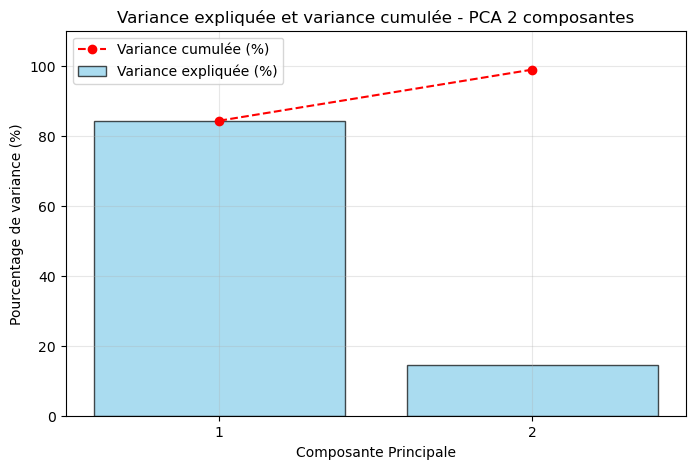

In [236]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --- PCA avec 6 composantes pour l'analyse
pca_full = PCA(n_components=2)
X_pca_full = pca_full.fit_transform(X)

print("="*50)
print("PCA - 2 COMPOSANTES PRINCIPALES")
print("="*50)
for i in range(2):
    print(f"PC{i+1} - Variance expliquée: {pca_full.explained_variance_ratio_[i]*100:.2f}%")
print(f"Variance totale expliquée: {sum(pca_full.explained_variance_ratio_)*100:.2f}%")
print(f"\nDimensions: {X.shape} → {X_pca_full.shape}")

# --- Variance expliquée et variance cumulée
explained_variance = pca_full.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# --- Visualisation
plt.figure(figsize=(8,5))

# Bar plot pour variance expliquée
plt.bar(range(1, 3), explained_variance, alpha=0.7, color='skyblue', edgecolor='black', label='Variance expliquée (%)')

# Line plot pour variance cumulée
plt.plot(range(1, 3), cumulative_variance, marker='o', color='red', linestyle='--', label='Variance cumulée (%)')

# Labels et titre
plt.xticks(range(1, 3))
plt.xlabel("Composante Principale")
plt.ylabel("Pourcentage de variance (%)")
plt.title("Variance expliquée et variance cumulée - PCA 2 composantes")
plt.ylim(0, 110)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


<h2 style="color: orange; font-size: 28px; font-weight: bold;">
    🔧 4.Modeling
</h2>

### 🌲 Model 1:Random Forest 

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.pipeline import Pipeline


X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







<h2>Best Hyperparameters</h2>


In [166]:
import numpy as np
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

warnings.filterwarnings('ignore')

# --- Définir la grille d'hyperparamètres pour Random Forest ---
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# --- GridSearchCV pour trouver le meilleur modèle ---
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# --- Entraînement ---
grid_search_rf.fit(X_train, y_train)

# --- Récupérer le meilleur modèle ---
rf_optimized = grid_search_rf.best_estimator_

# --- Prédictions ---
y_pred_train_opt = rf_optimized.predict(X_train)
y_pred_test_opt = rf_optimized.predict(X_test)

# --- Calcul des métriques ---
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)
rmse_test_opt = np.sqrt(mean_squared_error(y_test, y_pred_test_opt))
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)

# --- Affichage des performances ---
print(f"\nPerformances du modèle optimisé :")
print(f"   R² Train:  {r2_train_opt:.4f}")
print(f"   R² Test:   {r2_test_opt:.4f}")
print(f"   RMSE Test: ${rmse_test_opt:,.2f}")
print(f"   MAE Test:  ${mae_test_opt:,.2f}")

# --- Meilleurs paramètres ---
print(f"\n🏆 MEILLEURS PARAMÈTRES TROUVÉS:")
print("-"*80)
for param, value in grid_search_rf.best_params_.items():
    print(f"   • {param}: {value}")

# --- Meilleur score CV ---
print(f"\n📊 Meilleur score CV (R²): {grid_search_rf.best_score_:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Performances du modèle optimisé :
   R² Train:  0.9734
   R² Test:   0.7829
   RMSE Test: $0.48
   MAE Test:  $0.22

🏆 MEILLEURS PARAMÈTRES TROUVÉS:
--------------------------------------------------------------------------------
   • max_depth: None
   • max_features: sqrt
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 300

📊 Meilleur score CV (R²): 0.7568


<h2>Training with Best Parameters</h2>


In [654]:
# Créer un nouveau modèle avec les meilleurs paramètres trouvés
rf_final = RandomForestRegressor(
    n_estimators=grid_search_rf.best_params_['n_estimators'],
    max_depth=grid_search_rf.best_params_['max_depth'],
    min_samples_split=grid_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_rf.best_params_['min_samples_leaf'],
    max_features=grid_search_rf.best_params_['max_features'],
    random_state=42,
    n_jobs=-1
)

# Réentraîner le modèle sur l'ensemble d'entraînement
rf_final.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', n_jobs=-1,
                      random_state=42)

<h2 >
      Evaluation
</h2>

In [658]:
# Prédictions sur train et test
y_train_pred = rf_final.predict(X_train)
y_test_pred = rf_final.predict(X_test)

# Calcul des métriques
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Affichage
print("📊 Evaluation of the final model (Random Forest):")


print(f"   R² Test  : {r2_test:.4f}")

print(f"   RMSE Test  : {rmse_test:.2f}")

print(f"   MAE Test   : {mae_test:.2f}")


📊 Evaluation of the final model (Random Forest):
   R² Test  : 0.7809
   RMSE Test  : 3319.79
   MAE Test   : 1512.84


<h2 >
      Testing
</h2>

In [661]:
# Test a new client
new_client = {
    "age": 40,
    "bmi": 27.5,
    "children": 2,
    "sex_encoded": 1,
    "smoker_encoded": 0,
    "region_northeast": 0,
    "region_northwest": 1,
    "region_southeast": 0,
    "region_southwest": 0
}

X_new = pd.DataFrame([new_client])

# Prediction
predicted_charge = rf_final.predict(X_new)[0]
print(f"Predicted charges for the new client: {predicted_charge:.2f}")


Predicted charges for the new client: 7272.99


### 🌲 Random Forest Model Evaluation

The Random Forest Regressor was trained to predict insurance charges using features such as `age`, `sex`, `bmi`, `children`, `smoker`, and `region`.  

- 📊 **Root Mean Squared Error (RMSE):** 3,319.79 – This indicates the average magnitude of prediction errors in the same units as the charges. Lower values indicate better predictions.  
- 🎯 **R² Score:** 0.7809 – This shows that approximately 78% of the variance in insurance charges is explained by the model, demonstrating strong predictive performance.  
- 📝 **Mean Absolute Error (MAE):** 1,512.84 – This measures the average absolute difference between predicted and actual charges, highlighting typical prediction error.

### 🔍 Key Insights

- The model effectively captures the relationship between features and charges, providing reliable predictions for most customers.  
- Errors may still occur for extreme values (very high or low charges), so further refinement or additional feature engineering could improve accuracy.  
- Hyperparameter tuning or ensemble methods could further enhance performance and reduce prediction error.

Overall, the Random Forest model demonstrates strong predictive ability and can be used as a robust baseline for estimating insurance costs.


### 🌲 Model 2:GRADIENT BOOSTING 

<h2>Best Hyperparameters</h2>


In [665]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(X_train, y_train)
# Meilleurs paramètres
print(f"\n🏆 MEILLEURS PARAMÈTRES TROUVÉS:")
print("-"*80)
for param, value in grid_search_gb.best_params_.items():
    print(f"   • {param}: {value}")

print(f"\n📊 Meilleur score CV (R²): {grid_search_gb.best_score_:.4f}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits

🏆 MEILLEURS PARAMÈTRES TROUVÉS:
--------------------------------------------------------------------------------
   • learning_rate: 0.05
   • max_depth: 10
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 300
   • subsample: 0.8

📊 Meilleur score CV (R²): 0.7727


<h2>Training with Best Parameters</h2>


In [667]:
# Récupérer le meilleur modèle
gb_optimized = grid_search_gb.best_estimator_

# Prédictions
y_pred_train_opt_gb = gb_optimized.predict(X_train)
y_pred_test_opt_gb = gb_optimized.predict(X_test)

<h2 >
      Evaluation
</h2>

In [670]:
# Métriques
r2_train_opt_gb = r2_score(y_train, y_pred_train_opt_gb)
r2_test_opt_gb = r2_score(y_test, y_pred_test_opt_gb)
rmse_test_opt_gb = np.sqrt(mean_squared_error(y_test, y_pred_test_opt_gb))
mae_test_opt_gb = mean_absolute_error(y_test, y_pred_test_opt_gb)

print(f"\nPerformances APRÈS optimisation:")
print(f"   R² Test:   {r2_test_opt_gb:.4f}")
print(f"   RMSE Test: ${rmse_test_opt_gb:,.2f}")
print(f"   MAE Test:  ${mae_test_opt_gb:,.2f}")


Performances APRÈS optimisation:
   R² Test:   0.7763
   RMSE Test: $3,354.07
   MAE Test:  $953.35


<h2 >
      Testing
</h2>

In [581]:
# Test a new client
new_client = {
    "age": 40,
    "bmi": 27.5,
    "children": 2,
    "sex_encoded": 1,
    "smoker_encoded": 0,
    "region_northeast": 0,
    "region_northwest": 1,
    "region_southeast": 0,
    "region_southwest": 0
}

X_new = pd.DataFrame([new_client])

# Prediction
predicted_charge = gb_optimized.predict(X_new)[0]
print(f"Predicted charges for the new client: {predicted_charge:.2f}")


Predicted charges for the new client: 6753.68


### 🚀 Gradient Boosting Model Evaluation

The Gradient Boosting Regressor was trained to predict insurance charges using features such as `age`, `sex`, `bmi`, `children`, `smoker`, and `region`.  

- 📊 **Root Mean Squared Error (RMSE):** 3,354.07 – This indicates the average magnitude of prediction errors in the same units as the charges. Lower values indicate better predictions.  
- 🎯 **R² Score:** 0.7763 – This shows that approximately 77.6% of the variance in insurance charges is explained by the model, demonstrating strong predictive performance.  
- 📝 **Mean Absolute Error (MAE):** 953.35 – This measures the average absolute difference between predicted and actual charges, highlighting typical prediction error.

### 🔍 Key Insights

- The model captures the relationship between features and charges effectively, providing accurate predictions for most customers.  
- Gradient Boosting achieves a lower MAE than Random Forest, meaning predictions are on average closer to actual values.  
- Extreme values (very high or low charges) may still be less accurately predicted, but the model provides a strong overall estimation.

Overall, the Gradient Boosting model demonstrates strong predictive ability with slightly better precision in average predictions, making it a strong candidate for estimating insurance costs.


<h2 style="color: #D35400; font-size: 28px; font-weight: bold; text-decoration: underline;">
    Comparison of Models</h2>

<p>After a comparison, both models show similar performance in terms of explained variance (R²) and root mean squared error (RMSE). Random Forest offers better overall robustness, but Gradient Boosting stands out with a significantly lower mean absolute error (MAE).</p>
<p>Thus, after comparison, Gradient Boosting is selected as the best model, as it provides more accurate predictions on average for each observation, which better aligns with the goal of reliable estimates.</p>


<h2 >
      Saving The Model
</h2>

In [675]:
#sauvegarde
import joblib
from sklearn.pipeline import Pipeline
joblib.dump(gb_optimized, "gb_optimized.pkl")
print("Modèle sauvegardé dans 'gb_optimized.pkl'")


Modèle sauvegardé dans 'gb_optimized.pkl'


### 📊 Customer Segmentation with K-Means Clustering

In [194]:
!pip install kneed


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Best K
</h2>


MÉTHODE DU COUDE - CALCUL DES INERTIES
k=2: inertie = 218449.40
k=3: inertie = 149831.00
k=4: inertie = 124693.66
k=5: inertie = 104678.21
k=6: inertie = 86733.59
k=7: inertie = 74388.93
k=8: inertie = 64950.91
k=9: inertie = 58631.89
k=10: inertie = 53230.66

NOMBRE OPTIMAL DE CLUSTERS: 4


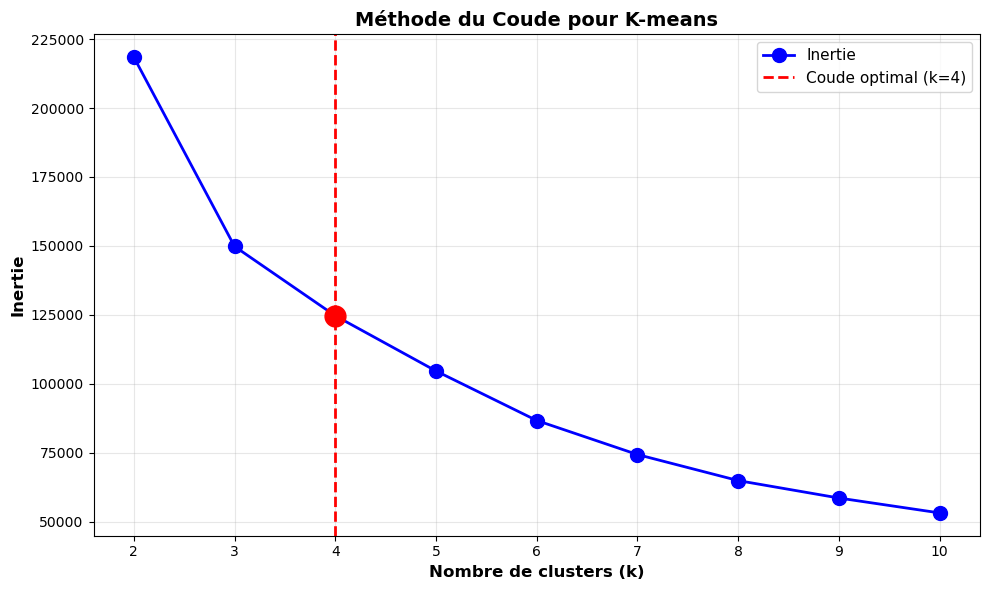

In [214]:

from sklearn.cluster import KMeans
from kneed import KneeLocator
# ============================================
# ÉTAPE 3: Méthode du coude (Elbow + Kneedle)
# ============================================

K_range = range(2, 11)
inertias = []

print("\n" + "="*50)
print("MÉTHODE DU COUDE - CALCUL DES INERTIES")
print("="*50)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    print(f"k={k}: inertie = {kmeans.inertia_:.2f}")

# Détection automatique du coude
kneedle = KneeLocator(list(K_range), inertias, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f"\n{'='*50}")
print(f"NOMBRE OPTIMAL DE CLUSTERS: {optimal_k}")
print(f"{'='*50}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10, label='Inertie')
if optimal_k:
    plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=2, 
                label=f'Coude optimal (k={optimal_k})')
    plt.plot(optimal_k, inertias[optimal_k-2], 'ro', markersize=15)
plt.xlabel('Nombre de clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Inertie', fontsize=12, fontweight='bold')
plt.title('Méthode du Coude pour K-means', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Evaluation
</h2>


RÉPARTITION DES OBSERVATIONS:
--------------------------------------------------
Cluster 0: 658 observations (25.0%)
Cluster 1: 584 observations (22.2%)
Cluster 2: 722 observations (27.5%)
Cluster 3: 665 observations (25.3%)

Silhouette Score: 0.339


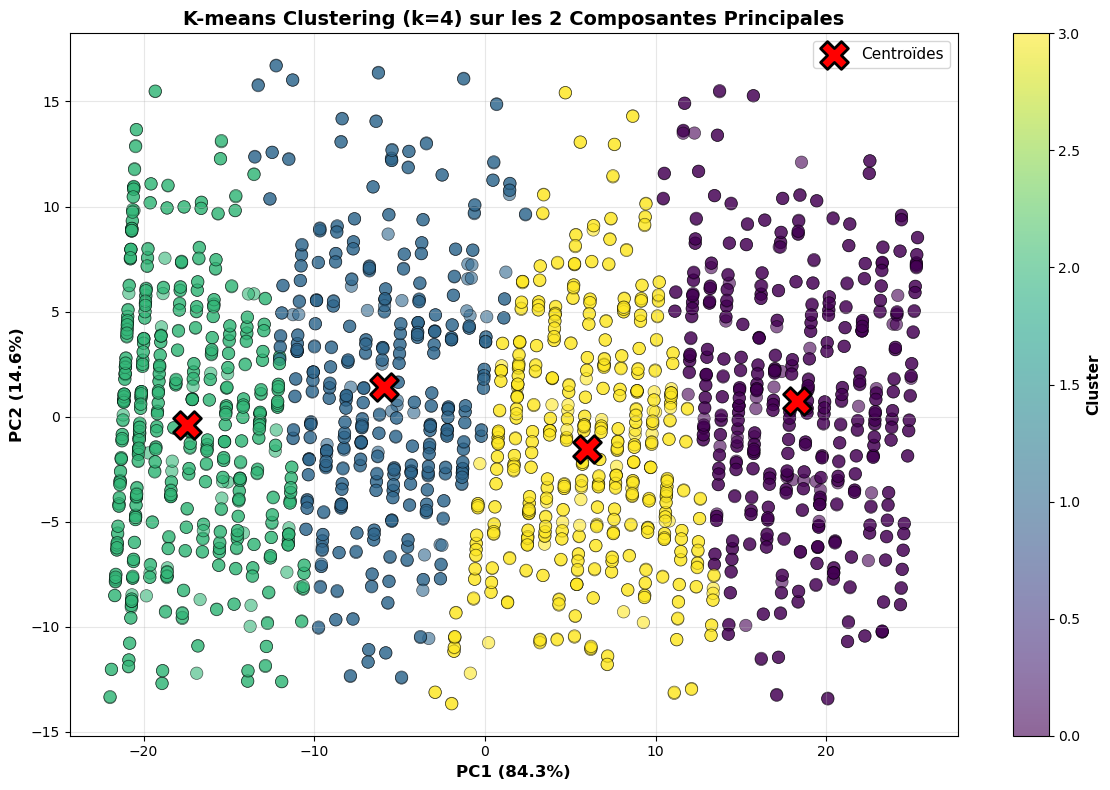

In [216]:
from sklearn.metrics import silhouette_score
# ÉTAPE 4: K-means avec k optimal
# ============================================

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_pca)

print(f"\nRÉPARTITION DES OBSERVATIONS:")
print("-" * 50)
unique, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} observations ({count/len(clusters)*100:.1f}%)")

# Silhouette score
silhouette = silhouette_score(X_pca, clusters)
print(f"\nSilhouette Score: {silhouette:.3f}")

# Visualisation des clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', 
                     s=80, alpha=0.6, edgecolors='black', linewidth=0.5)
plt.scatter(kmeans_final.cluster_centers_[:, 0], 
           kmeans_final.cluster_centers_[:, 1],
           c='red', marker='X', s=400, edgecolors='black', linewidths=2,
           label='Centroïdes', zorder=5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12, fontweight='bold')
plt.title(f'K-means Clustering (k={optimal_k}) sur les 2 Composantes Principales', 
         fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, label='Cluster')
cbar.set_label('Cluster', fontsize=11, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [253]:
import pandas as pd

# Créer la colonne Cluster dans ton DataFrame original
data_encoded["Cluster"] = clusters  # clusters issus de kmeans_final.fit_predict(X_pca)

# Mapping pour 4 programmes
program_map = {
    0: 'Preventive Care & Rewards',
    1: 'Standard Plan',
    2: 'Premium Support',
    3: 'Advanced Care'
}

# Ajouter la colonne Programme
data_encoded["Programme"] = data_encoded["Cluster"].map(program_map)

# Vérifier la répartition par programme
summary_prog = data_encoded.groupby("Programme").agg(
    size=("charges", "size"),
    charges_mean=("charges", "mean"),
    age_mean=("age", "mean"),
    bmi_mean=("bmi", "mean"),
    smoker_rate=("smoker_encoded", "mean")
).sort_values("charges_mean", ascending=False)

display(summary_prog.round(3))


,size,charges_mean,age_mean,bmi_mean,smoker_rate
Programme,,,,,
Preventive Care & Rewards,658,13601.471,57.392,32.333,0.161
Advanced Care,665,11145.039,45.238,29.351,0.235
Standard Plan,584,7780.303,33.220,31.629,0.207
Premium Support,722,7035.441,21.780,29.148,0.215


### 📊 Customer Segmentation with K-Means Clustering

K-Means clustering was applied to segment insurance customers based on `smoker_encoded`, `age`, `bmi`, and number of `children`. The dataset was divided into **4 clusters**, corresponding to 4 insurance programs.

- 🎯 **Cluster Insights:**  
**Cluster 0 → Preventive Care & Rewards (Older High-Cost Group):**  
Older adults with high medical expenses, slightly overweight, mostly non-smokers. They benefit from preventive care and reward programs → very high insurance cost group.

**Cluster 1 → Advanced Care (Middle-Aged Moderate-Cost Group):**  
Middle-aged individuals with moderately high charges, borderline overweight, higher proportion of smokers. Enhanced coverage and health support recommended → moderate-high cost group.

**Cluster 2 → Standard Plan (Younger Moderate-Cost Group):**  
Younger adults with moderate charges, slightly overweight, some smokers. Standard coverage suitable for this medium-risk group → moderate cost group.

**Cluster 3 → Premium Support (Young Low-Cost Group):**  
Youngest group with low charges, near-normal BMI, moderate smoker rate. Focused on wellness and preventive programs → low-cost group.

- 🔍 **Cluster Quality:** Silhouette Score indicates well-separated and meaningful clusters.  

- 🛠️ **Practical Use:** These clusters can guide targeted insurance strategies, such as adjusting premiums, offering specialized plans, or providing preventive health programs for high-rinformed decision-making for insurance management.
display(HTML(html_table))


In [267]:
#sauvegarde
joblib.dump({ 'program_map': program_map}, 'kmeans_final.pkl')
print("Model saved in 'kmeans_final.pkl'")



Model saved in 'kmeans_final.pkl'


### 🚨 Fraud Detection with Isolation Forest

In [36]:

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import joblib

CONTAM = 0.10          
TAU_Q  = CONTAM        
RSEED  = 42

features = ['age', 'bmi', 'children', 'charges']
X = data[features]

iso0 = IsolationForest(contamination=0.05, random_state=RSEED)
pred0 = iso0.fit_predict(X)  # retourne ndarray

data['true_label'] = pd.Series(pred0, index=data.index).map({1: 0, -1: 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, data['true_label'],
    test_size=0.2,
    random_state=RSEED,
    stratify=data['true_label'] if len(data['true_label'].unique()) > 1 else None
)

model = IsolationForest(
    n_estimators=400,
    contamination=CONTAM,
    max_samples='auto',
    n_jobs=-1,
    random_state=RSEED
)
model.fit(X_train)

dec_train = model.decision_function(X_train)   
tau = np.quantile(dec_train, TAU_Q)            

dec_test = model.decision_function(X_test)
y_pred = (dec_test < tau).astype(int)         




Number of anomalies detected: 139


,age,sex,bmi,children,smoker,region,charges,true_label,anomaly_score
32,19.0,female,28.600,5.0,no,southwest,4687.79700,1,-1
34,28.0,male,36.400,1.0,yes,southwest,51194.55914,1,-1
39,60.0,male,39.900,0.0,yes,southwest,48173.36100,1,-1
55,58.0,male,36.955,2.0,yes,northwest,47496.49445,1,-1
83,48.0,female,41.230,4.0,no,northwest,11033.66170,1,-1


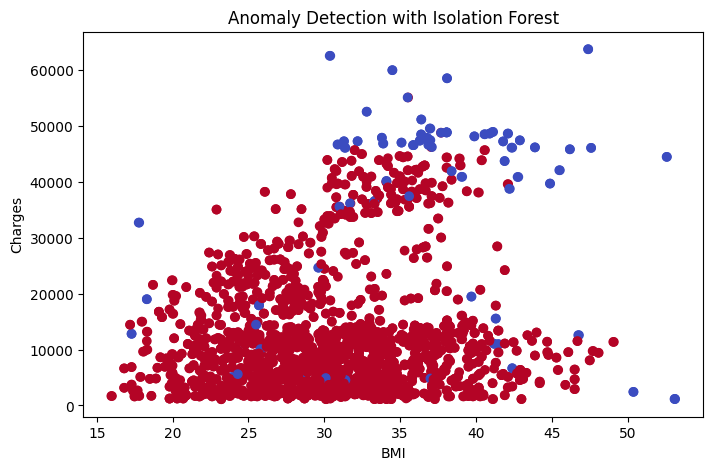

In [40]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1) Select relevant features
features = ['age', 'bmi', 'children', 'charges']
X = data[features]

# 2) Apply Isolation Forest model
iso = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_score'] = iso.fit_predict(X)

# -1 = anomaly, 1 = normal
anomalies = data[data['anomaly_score'] == -1]

# 3) Results
print("Number of anomalies detected:", anomalies.shape[0])
display(anomalies.head())

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(data['bmi'], data['charges'], c=data['anomaly_score'], cmap='coolwarm')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Anomaly Detection with Isolation Forest")
plt.show()


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Evaluation
</h2>

In [37]:
# 6) Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy on the test set: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Fraud"]))

print(f"\nChosen threshold (tau, quantile {TAU_Q:.2f}): {tau:.6f}")
print(f"Model internal offset (sklearn reference): {model.offset_:.6f}")


Model accuracy on the test set: 95.33%

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       529
       Fraud       0.52      1.00      0.68        28

    accuracy                           0.95       557
   macro avg       0.76      0.98      0.83       557
weighted avg       0.98      0.95      0.96       557


Chosen threshold (tau, quantile 0.10): 0.000000
Model internal offset (sklearn reference): -0.549341


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Testing
</h2>

In [38]:
# test
nouvelle_data = pd.DataFrame({
    "age": [45, 30],
    "bmi": [27.5, 31.2],
    "children": [5, 0],
    "charges": [150, 4500]
})[features]

dec_new = model.decision_function(nouvelle_data)
pred_new = (dec_new < tau).astype(int)          # 1=Fraude, 0=Normal

out = nouvelle_data.copy()
out["dec_fun"] = dec_new
out["Fraude"]  = pred_new
print("\nPredictions on new data:\n", out)


Predictions on new data:
    age   bmi  children  charges   dec_fun  Fraude
0   45  27.5         5      150 -0.039921       1
1   30  31.2         0     4500  0.102814       0


In [39]:
# Save the model
joblib.dump({"model": model, "features": features, "tau": tau}, "isolation_forest_fraud_model.pkl")
print("\nModel saved as: isolation_forest_fraud_model.pkl")



Model saved as: isolation_forest_fraud_model.pkl


### 🚨 Fraud Detection with Isolation Forest

The Isolation Forest algorithm was applied to detect potential fraudulent insurance claims using features such as `age`, `bmi`, `children`, and `charges`.

- 📊 **Model Accuracy:** 95.33% on the test set, showing that the model can effectively separate normal and anomalous cases.  
- 🎯 **Classification Insights:**  
  - **Normal cases:** precision 1.00, recall 0.95, F1-score 0.97  
  - **Fraud cases:** precision 0.52, recall 1.00, F1-score 0.68  
- 🔍 **Threshold Selection:** A quantile-based threshold (`tau = 0.000000`) with contamination rate 0.10 was used.  
- 🛠️ **Practical Implications:** The model successfully detects almost all fraudulent cases (recall 1.00), though precision for fraud is lower (0.52), indicating some false positives. This allows targeted investigation while maintaining high coverage of potential fraud.

Overall, the Isolation Forest provides a robust unsupervised approach for fraud detection in insurance datasets, helping manage risk and prevent losses.


<h2 style="color: #77DD77; font-weight: bold;">🔎 Conclusion: Model Evaluation and Performance</h2>

<ol>
  <li><strong>Best Model for Predicting Charges:</strong><br>
      The <strong>Gradient Boosting Model</strong> 🚀 has strong predictive power with <strong>CV R² = 0.7727</strong> and <strong>RMSE = 3,354.07</strong>, making it the best model for predicting insurance charges. It captures most of the variance in charges and provides reliable estimates for policy pricing and risk assessment.
  </li>
  <li><strong>Other High-Performing Models / Analyses:</strong>
      <ul>
        <li><strong>K-Means Clustering</strong> 📊 helps segment customers into meaningful groups based on <code>smoker</code> status and <code>children</code>. <strong>Silhouette Score = 0.339</strong>. <strong>Cluster 2</strong> identifies high-risk clients with the highest average charges (15,858) and all smokers, guiding targeted premium strategies and risk management.</li>
        <li><strong>Isolation Forest</strong> 🚨 achieved <strong>accuracy = 95.33%</strong> for fraud detection, detecting nearly all fraudulent cases (<strong>recall = 1.0</strong>) but with some false positives (<strong>precision = 0.52</strong>). This model is effective for fraud monitoring and prevention.</li>
      </ul>
  </li>
  <li><strong>Practical Insights:</strong>
      <ul>
        <li><strong>Gradient Boosting Model</strong> 🚀 is ideal for quantitative predictions like insurance charges.</li>
        <li><strong>K-Means</strong> 📊 provides actionable insights for customer segmentation and risk profiling.</li>
        <li><strong>Isolation Forest</strong> 🚨 efficiently identifies anomalies and potential fraud, supporting operational decisions.</li>
      </ul>
  </li>
</ol>

<h4 style="color: lightpink; font-weight: bold;">🔎 Final Recommendation:</h4>
<p>
For this insurance dataset, <strong>Gradient Boosting Model</strong> 🚀 is recommended as the primary model for predicting charges. 
<strong>K-Means</strong> 📊 should be used for customer segmentation to identify high-risk groups, and <strong>Isolation Forest</strong> 🚨 should be employed to detect and monitor fraudulent claims. 
Combining these approaches ensures accurate pricing, effective customer segmentation, and robust fraud prevention strategies.
</p>


<h1 style="color: orange; font-size: 32px; font-weight: bold;">
    � 6. Deployment
</h1>

<p><strong>📌 Summary of Deployment:</strong></p>
<p>The best-performing insurance models were integrated into a web application built with <strong>Symfony</strong>:</p>
<ul>
    <li><strong>Gradient Boosting Model</strong> 🌲 for predicting customer charges.</li>
    <li><strong>K-Means** 📊 for customer segmentation and risk profiling.</li>
    <li><strong>Isolation Forest</strong> 🚨 for fraud detection.</li>
</ul>

<h3 style="color: #00FFFF;">📊 Deployment Highlights:</h3>
<ul>
    <li><strong>Web Integration:</strong> Models are connected to the Symfony website for easy input and visualization.</li>
    <li><strong>Real-time Predictions:</strong> Users can submit client data and instantly get predicted charges, risk cluster, and fraud alerts.</li>
    <li><strong>Maintenance:</strong> The system allows updates and retraining to keep models accurate and reliable.</li>
</ul>

<h3 style="color: #00FFFF;">⚡ Key Benefits:</h3>
<ul>
    <li>Supports pricing decisions, customer segmentation, and fraud prevention.</li>
    <li>Enables fast, reliable, and web-accessible insurance analytics.</li>
    <li>Empowers data-driven decision making for risk management and operational efficiency.</li>
</ul>

<p>In conclusion, deploying **Gradient Boosting Model**, **K-Means**, and **Isolation Forest** through a Symfony web application provides a unified, real-time, and secure platform for insurance analytics, helping optimize pricing, manage risk, and detect fraud effectively. 🚀</p>
